In [1]:
import AssetManagerMachineLearning as aml
import numpy as np, pandas as pd, matplotlib.pyplot as plt

### Denoising and Detoning

Maecenko-Pastur pdf

In [2]:
N = 1000
T = 10000
x = np.random.normal(0, 1, size = (T, N))
cor = np.corrcoef(x, rowvar=0) # cor.shape = (1000,1000). If rowvar=1 - row represents a var, with observations in the columns.
eVal0 , eVec0 = aml.getPCA( cor )
pdf0 = aml.mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
pdf1 = aml.fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf

<AxesSubplot:>

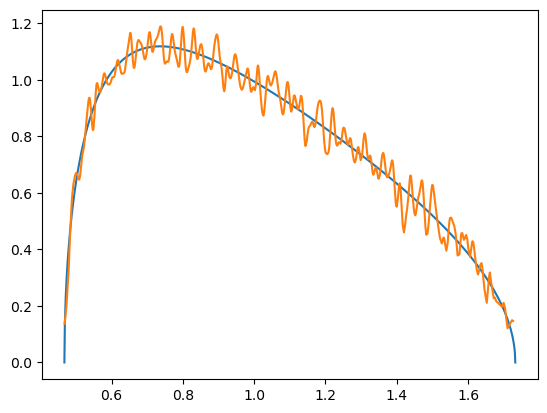

In [3]:
pdf0.plot()
pdf1.plot()

In [4]:
# code snippet 2.3 - random matrix with signal
alpha, nCols, nFact, q = .995, 1000, 100, 10
pdf0 = aml.mpPDF(1., q = x.shape[0]/float(x.shape[1]), pts = N)
cov = np.cov(np.random.normal(size = (nCols*q, nCols)), rowvar = 0) #size = (1000*10,1000)
cov = alpha * cov+(1 - alpha) * aml.getRndCov(nCols, nFact) # noise + signal
corr0 = aml.cov2corr(cov)
eVal01, eVec01 = aml.getPCA(corr0)
pdf2 = aml.fitKDE(np.diag(eVal01), bWidth=.15) #empirical pdf

<AxesSubplot:>

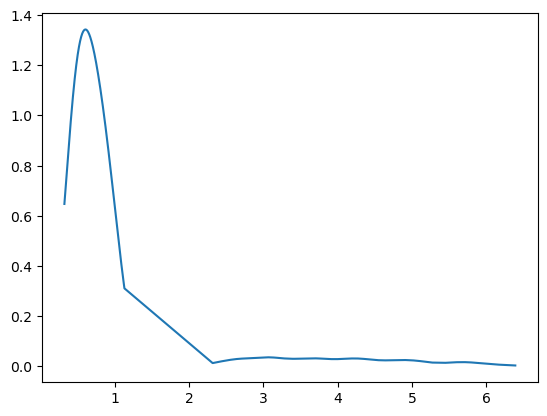

In [5]:
pdf2.plot()

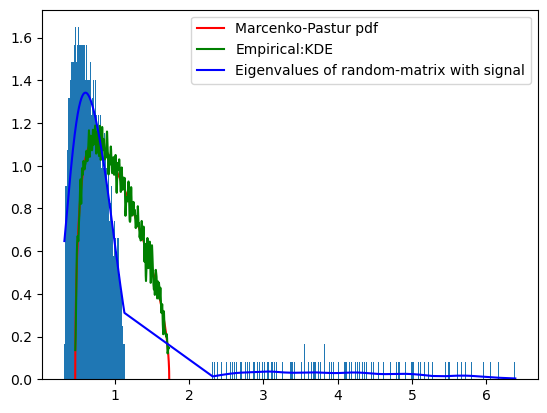

In [6]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal01), density = True, bins=500) # Histogram the eigenvalues

plt.plot(pdf0.keys(), pdf0, color='r', label = "Marcenko-Pastur pdf")
plt.plot(pdf1.keys(), pdf1, color='g', label = "Empirical:KDE")
plt.plot(pdf2, color='b', label="Eigenvalues of random-matrix with signal")
plt.legend(loc="upper right")
plt.show()

In [7]:
eMax0, var0 = aml.findMaxEval(np.diag(eVal01), q, bWidth=.01)
nFacts0 = eVal01.shape[0]-np.diag(eVal01)[::-1].searchsorted(eMax0)

sse:751.017930916189
sse:751.0178375521131
sse:287.71684164069245
sse:287.716837529894
sse:278.50620686362896
sse:278.5062114714535
sse:227.00928499568735
sse:227.0092925107325
sse:336.32782297578956
sse:336.3277683183526
sse:60.43742271721078
sse:60.43743402282565
sse:18.649428936529254
sse:18.649431138041237
sse:5103.479191875944
sse:5103.47867976135
sse:61.06301830709036
sse:61.06299864028433
sse:17.970718280008974
sse:17.970718610360123
sse:17.955890213131262
sse:17.9558901982446
sse:17.95586030143249
sse:17.95586030152768
sse:17.955860300256486
sse:17.95586030025654
found errPDFs0.6781172750029336


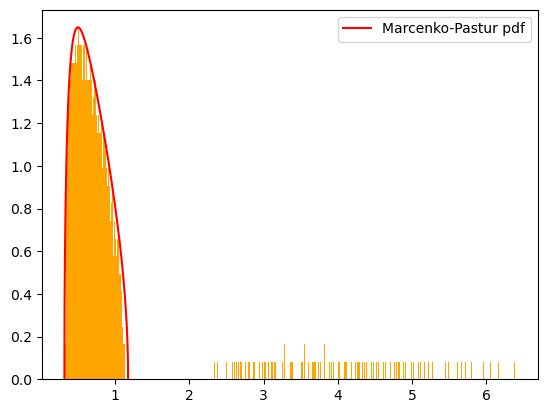

In [8]:
pdf0 = aml.mpPDF(var0, q=x.shape[0]/float(x.shape[1]), pts=N)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal01), color = 'orange', density = True, bins=500) # Histogram the eigenvalues

plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
#plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")
#plt.plot(pdf2, color='b', label="Eigenvalues of random-matrix with signal")
plt.legend(loc="upper right")
plt.show()

In [9]:
corr1 = aml.denoisedCorr(eVal01, eVec01, nFacts0)
eVal1, eVec1 = aml.getPCA(corr1)

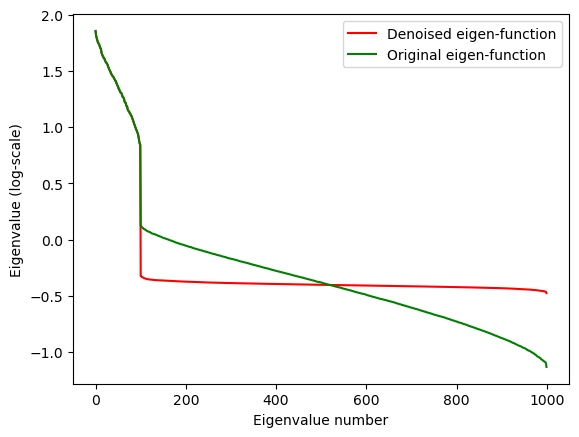

In [10]:
denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

In [11]:
nBlocks, bSize, bCorr = 2, 2, .5
np.random.seed(0)
mu0, cov0 = aml.formTrueMatrix(nBlocks, bSize, bCorr)

In [12]:
nObs, nTrials, bWidth, shrink, minVarPortf = 5, 5, .01, False, True
w1 = pd.DataFrame(columns = range(cov0.shape[0]), index = range(nTrials), dtype=float)

In [13]:
w1_d = w1.copy(deep=True)
np.random.seed(0)
for i in range(nTrials):
    mu1, cov1 = aml.simCovMu(mu0, cov0, nObs, shrink = shrink)
    if minVarPortf: mu1 = None
    cov1_d = aml.deNoiseCov(cov1, nObs*1./cov1.shape[1], bWidth)
    w1.loc[i] = aml.optPort(cov1, mu1).flatten() # add column vector w as row in w1
    w1_d.loc[i] = aml.optPort(cov1_d, mu1).flatten() # np.sum(w1_d, axis=1) is vector of 1's. sum(np.sum(w1_d, axis=0)= nTrials
    # so minimum-variance-portfolio is 1./nTrials*(np.sum(w1_d, axis=0)) - but distribution not stationary

min_var_port = 1./nTrials*(np.sum(w1_d, axis=0))

sse:2424.584695463648
sse:2424.5846443872083
sse:1609.2867784730504
sse:1609.2867965757841
found errPDFs0.99999
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 11 03:09:11 AM: Your problem has 4 variables, 2 constraints, and 0 parameters.
(CVXPY) May 11 03:09:11 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 11 03:09:11 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 11 03:09:11 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 11 03:09:11 AM: Compiling problem (target

In [14]:
#code snippet 2.11
w0 = aml.optPort(cov0, None if minVarPortf else mu0) # w0 true percentage asset allocation
w0 = np.repeat(w0.T, w1.shape[0], axis=0)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 11 03:09:12 AM: Your problem has 4 variables, 2 constraints, and 0 parameters.
(CVXPY) May 11 03:09:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 11 03:09:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 11 03:09:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 11 03:09:12 AM: Compiling problem (target solver=OSQP).
(CVXPY) May 11 03:09:12 AM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing 

In [15]:
rmsd = np.mean((w1-w0).values.flatten()**2)**.5     #RMSE not denoised
rmsd_d = np.mean((w1_d-w0).values.flatten()**2)**.5 #RMSE denoised
print("RMSE not denoised:"+str( rmsd))
print("RMSE denoised:"+str( rmsd_d))

ValueError: Unable to coerce to Series, length must be 4: given 20

#### Exercise 1
2.6절에 설명된 잡음 제거 방법을 파이썬으로 구현하라

In [16]:
corr_detoned_denoised = aml.detoned_corr(corr1, eVal1, eVec1)

eVal1_detoned, eVec1_detoned = aml.getPCA(corr_detoned_denoised)
detoned_denoised_eigenvalue = np.diag(eVal1_detoned)
denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)

/var/folders/_x/jd8cnzcs4v9dgfmy2l73m8b80000gn/T/ipykernel_8957/669325748.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(range(0, len(detoned_denoised_eigenvalue)), np.log(detoned_denoised_eigenvalue), color='b', label="Detoned, denoised eigen-function")


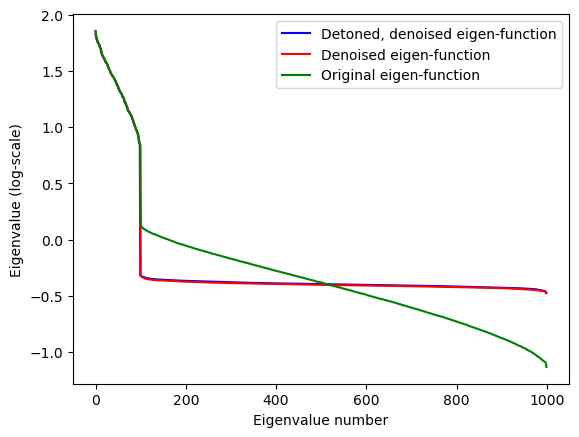

In [17]:
plt.plot(range(0, len(detoned_denoised_eigenvalue)), np.log(detoned_denoised_eigenvalue), color='b', label="Detoned, denoised eigen-function")
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

#### Exercise 2
일련의 주식 수익률 행렬을 사용한다